*Пример*: В сосуд, содержащий 10 л воды, непрерывно поступает со скоростью 2 л в минуту раствор, в каждом литре которого содержится 0.3 кг соли. Поступающий в сосуд раствор перемешивается с водой и смесь вытекает с той же скоростью. Сколько соли будет в растворе через 5 минут?

In [1]:
from sympy import *
init_printing()

Запишем константы

* $V = 10$ - объем сосуда в литрах
* $v = 2$ - скорость поступления воды в литрах в минуту
* $s_0 = 0.3$ - кг соли в 1 литре воды в поступающем растворе
* $T_{end} = 5$ - минут, через это время измеряем новую концентрацию соли

In [2]:
V = 10 # литров - объем сосуда
v = 2  # литров в минуту - вливается в сосуд и выливается из него
s0 = 0.3 # кг соли в 1 литре - концентрация вливаемого раствора
Tend = 5 # минут - время, когда нужно узнать концентрацию

За независимую переменную выберем $t$ - время в минутах

Определим функцию как $y(t)$ - сколько кг соли будет в сосуде через время $t$

За время $dt$ минут (очень маленькое) в сосуд влилось $v \cdot dt$ литров раствора концентрации $s_0$ и вылилось тоже $v \cdot dt$ литров раствора, но концентрации $y(t)$. Запишем сколько влилось и вылилось при этом **соли** в килограммах:

* влилось соли:  $$v \cdot s_0 \cdot dt$$
* вылилось соли (считая, что dt такое малое, что концентрация y(t) почти не изменилась, ее изменением можно пренебречь):
$$v \cdot y(t) \cdot dt$$

то есть изменение соли $dy$ это разница между тем, сколько влилось и сколько вылилось
$$dy = v \cdot s_0 \cdot dt - v \cdot y(t) \cdot dt$$
разделим на $dt$ правую и левую часть уравнения и устремим $dt$ к 0
$$\frac{dy}{dt} = v \cdot s_0 - v \cdot y(t)$$

При этом в начале t=0 в сосуде была вода (соли совсем не было, то есть 0 кг). Получим начальное условие  $$y(0) = 0$$

Решим полученное дифференициальное уравнение с граничными условиями:

In [3]:
# объявим переменные и функцию
t = symbols("t")
y = Function('y')(t)

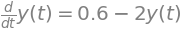

In [4]:
# запишем составленное по задаче дифференциальное уравнение 
eq = Eq(y.diff(), v*s0 - v*y)
eq

In [5]:
# решим дифференциальное уравнение, в решении есть свободная переменная С1
sol = dsolve(eq)
sol

In [6]:
# сохраним правую часть решения в отдельном выражении с С1
cfunc = sol.rhs
cfunc

In [7]:
# граничное условие y(0) = 0, запишем его в виде уравнения, решим его относительно С1
# готовимся писать уравнение относительно С1, подставляем t=0
cfunc.subs({t:0})

In [8]:
# граничное условие y(0) = 0 в виде уравнения:
ceq = Eq(cfunc.subs({t:0}), 0)
ceq

In [9]:
# решаем его относительно С1 и просим вернуть решение в виде словаря (будем поставлять далее)
csol = solve(ceq, dict=True)
csol

In [10]:
# подставляем найденное С1 в решение cfunc, сохраняем результат в yres
yres = cfunc.subs(csol[0])  # y(t) - решение
yres

In [11]:
# найдем сколько соли в t=Tend
res = yres.subs({t:Tend})
res

In [12]:
# вычисляем численно
res.n()

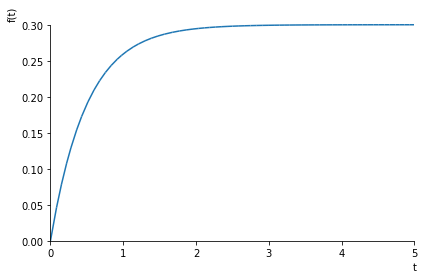

In [13]:
# нарисуем график, чтобы понять как меняется концентрация 
plot(yres, (t, 0, 5))